In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import json

from pathlib import Path
import pandas as pd
import numpy as np
import math
from functional import seq

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

import sys

sys.path.append("..")
from sgs_utils.path_conf import (
    speech_data_root_dir,
    speech_data_session_dir,
    loc_data_dir,
    speech_web_app_image_dir
)


In [3]:
df_session = pd.read_parquet(loc_data_dir.joinpath('df_session_uuid.parquet'))

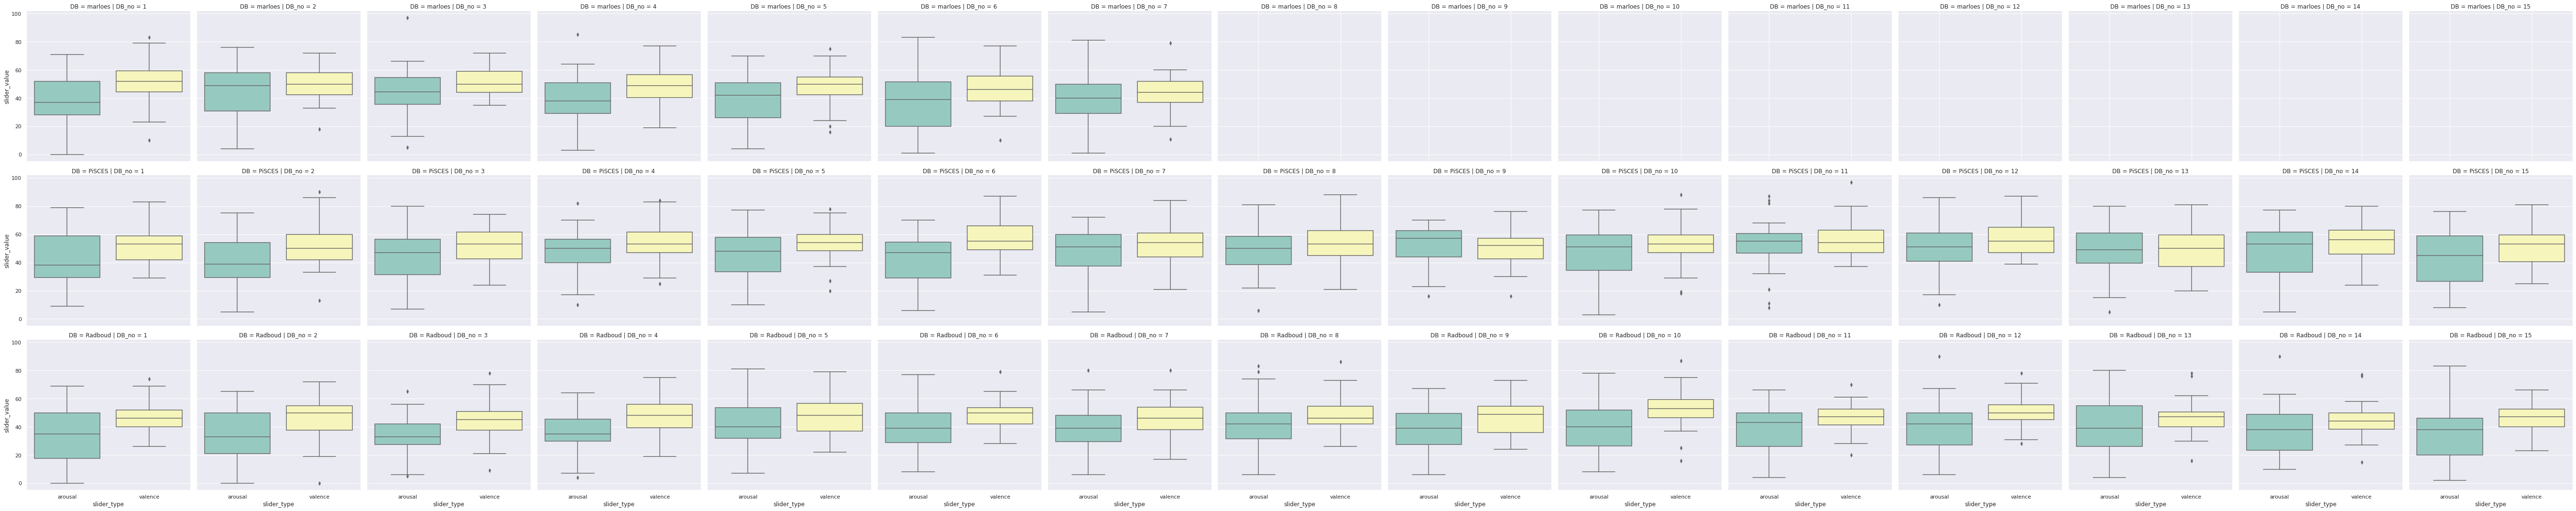

In [25]:
sns.catplot(
    data=df_session[df_session.DB_no < 16].melt(
        id_vars=set(df_session.columns).difference({"arousal", "valence"}),
        value_vars=["arousal", "valence"],
        var_name='slider_type',
        value_name='slider_value'
    ),
    kind='box', 
    x='slider_type',
    y='slider_value',
    row='DB',
    col='DB_no',
    palette='Set3'
)

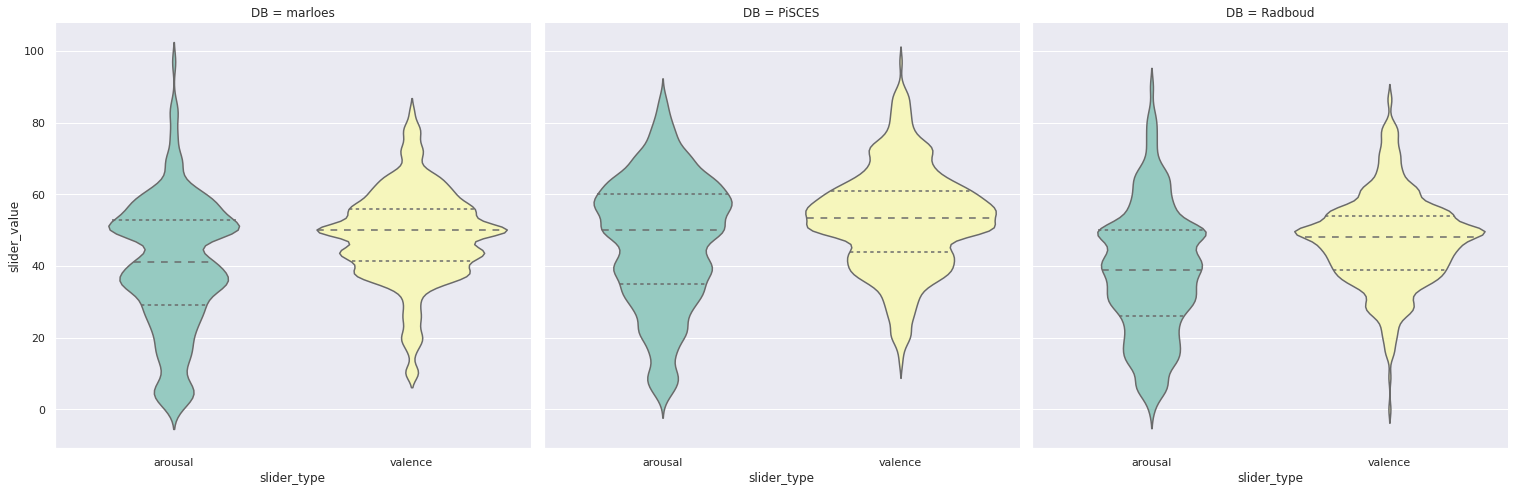

In [57]:
sns.catplot(
    data=df_session.melt(
        id_vars=set(df_session.columns).difference({"arousal", "valence"}),
        value_vars=["arousal", "valence"],
        var_name='slider_type',
        value_name='slider_value'
    ),
    sharex=True,
    sharey=True,
    legend=True,
    kind='violin', 
    x='slider_type',
    y='slider_value',
    col='DB',
    palette='Set3',
    bw=.15,
    inner='quartile',
    col_wrap=4,
    height=7
)

# Marloes: over time

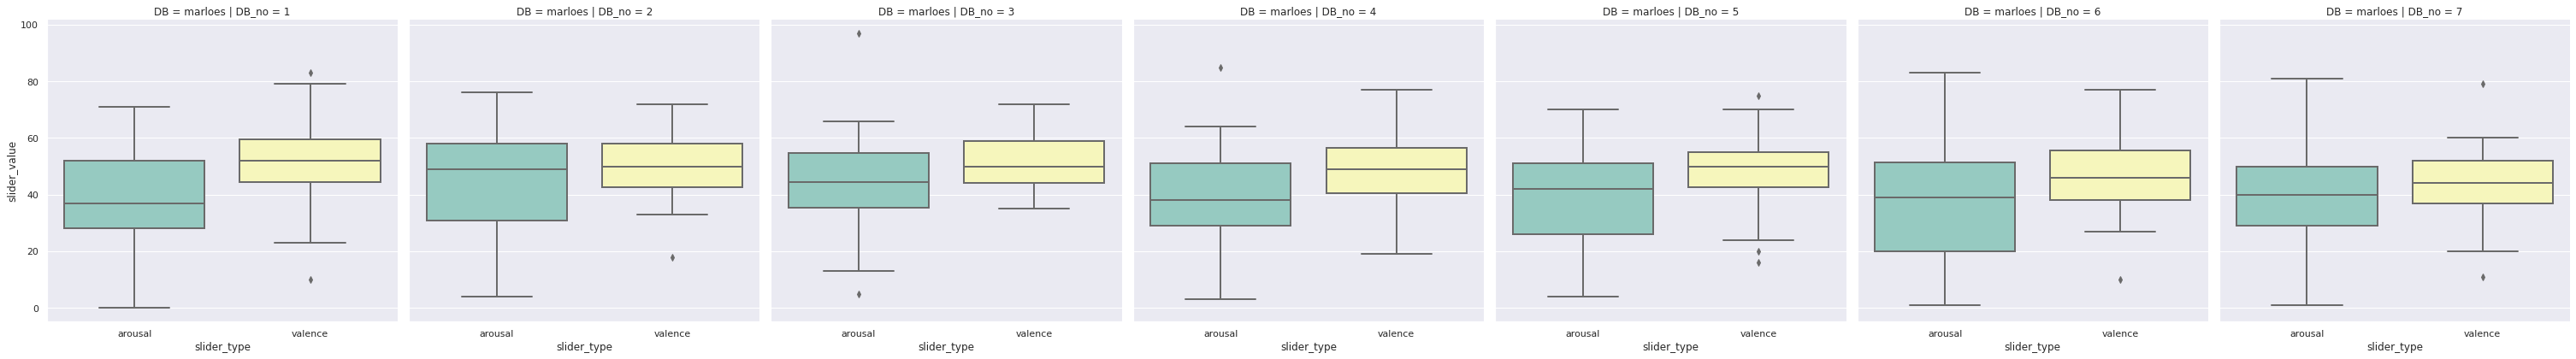

In [6]:
sns.catplot(
    data=df_session[df_session.DB == "marloes"].melt(
        id_vars=set(df_session.columns).difference({"arousal", "valence"}),
        value_vars=["arousal", "valence"],
        var_name="slider_type",
        value_name="slider_value",
    ),
    sharex=True,
    sharey=True,
    legend=True,
    kind="box",
    x="slider_type",
    y="slider_value",
    row="DB",
    col="DB_no",
    height=6,
    palette='Set3',
    linewidth=2,
)

## Fig & arousal valence distribution

In [7]:
def set_share_axes(axs, target=None, sharex=False, sharey=False):
    if target is None:
        target = axs.flat[0]
    # Manage share using grouper objects
    for ax in axs.flat:
        if sharex:
            target._shared_axes['x'].join(target, ax)
        if sharey:
            target._shared_axes['y'].join(target, ax)
    # Turn off x tick labels and offset text for all but the bottom row
    if sharex and axs.ndim > 1:
        for ax in axs[:-1,:].flat:
            ax.xaxis.set_tick_params(which='both', labelbottom=False, labeltop=False)
            ax.xaxis.offsetText.set_visible(False)
    # Turn off y tick labels and offset text for all but the left most column
    if sharey and axs.ndim > 1:
        for ax in axs[:,1:].flat:
            ax.yaxis.set_tick_params(which='both', labelleft=False, labelright=False)
            ax.yaxis.offsetText.set_visible(False)

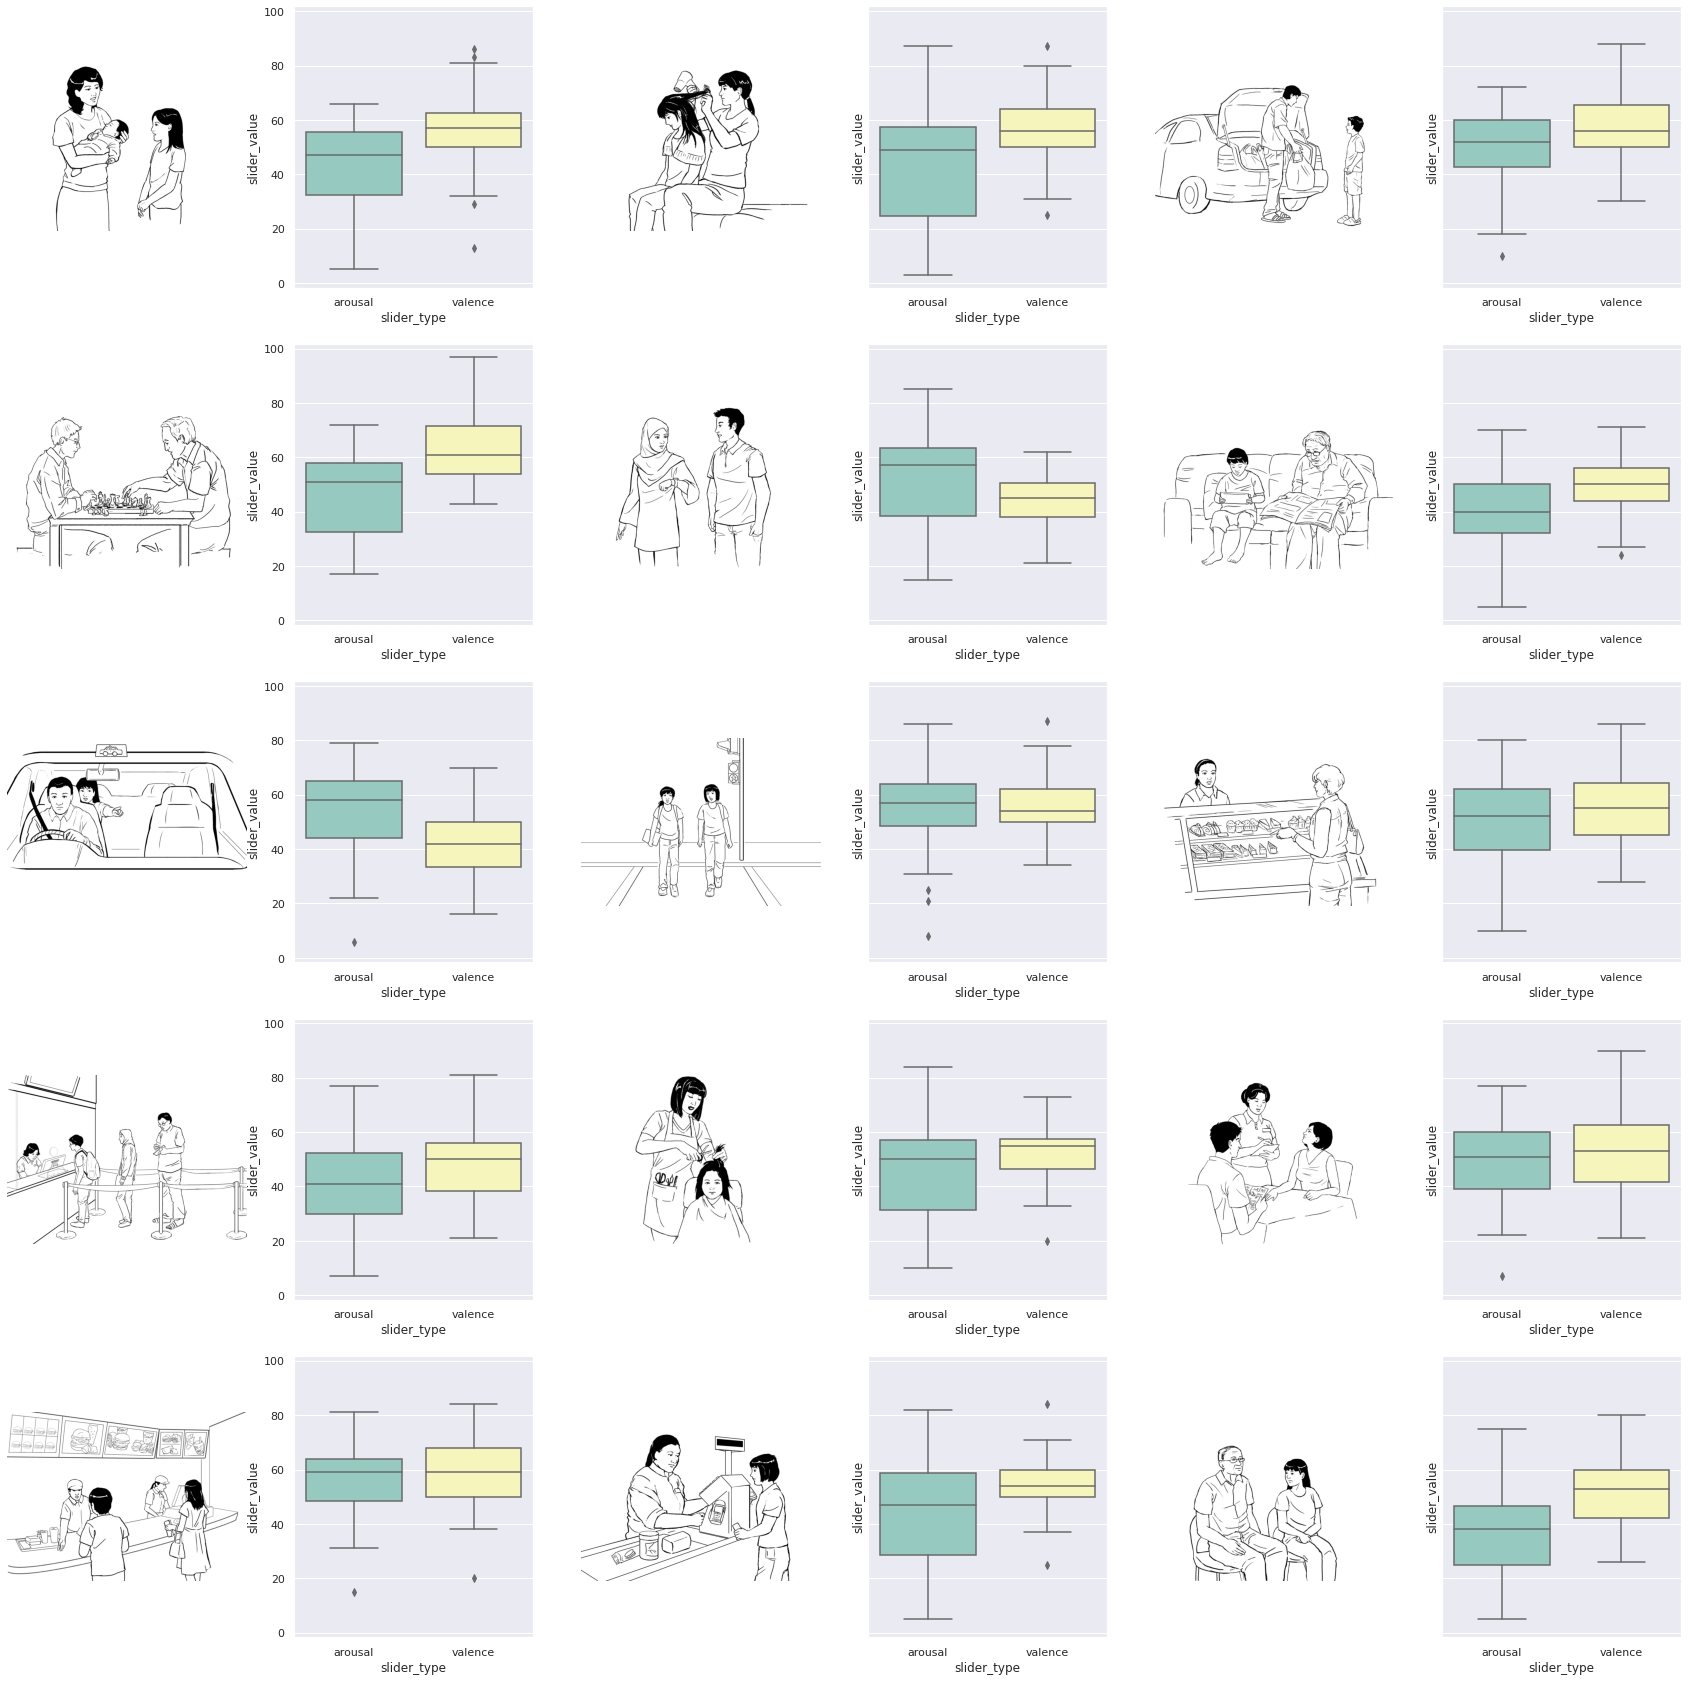

In [42]:
n_cols = 6
DB = "PiSCES"
fig, axs = plt.subplots(nrows=math.ceil(30 / n_cols), ncols=n_cols, figsize=(30, 30))

set_share_axes(axs=axs[:, 1::2], sharey=True)

for i, pic_name in enumerate(sorted(df_session[df_session.DB == DB].pic_name.unique())):
    ix2 = i * 2

    with open(
        list(speech_web_app_image_dir.joinpath(DB).glob(f"{pic_name}*"))[0], "rb"
    ) as f:
        img = plt.imread(f)

    if len(img.shape) == 2:
        img = np.repeat(img, 3).reshape(img.shape + (3,))

    axs[ix2 // n_cols, ix2 % n_cols].imshow(img)
    axs[ix2 // n_cols, ix2 % n_cols].axis("off")

    sns.boxplot(
        ax=axs[(ix2 + 1) // n_cols, (ix2 + 1) % n_cols],
        data=df_session[(df_session.DB == DB) & (df_session.pic_name == pic_name)].melt(
            id_vars=set(df_session.columns).difference({"arousal", "valence"}),
            value_vars=["arousal", "valence"],
            var_name="slider_type",
            value_name="slider_value",
        ),
        x="slider_type",
        y="slider_value",
        palette="Set3",
        # bw=0.3,
        # inner="quartile",
    )

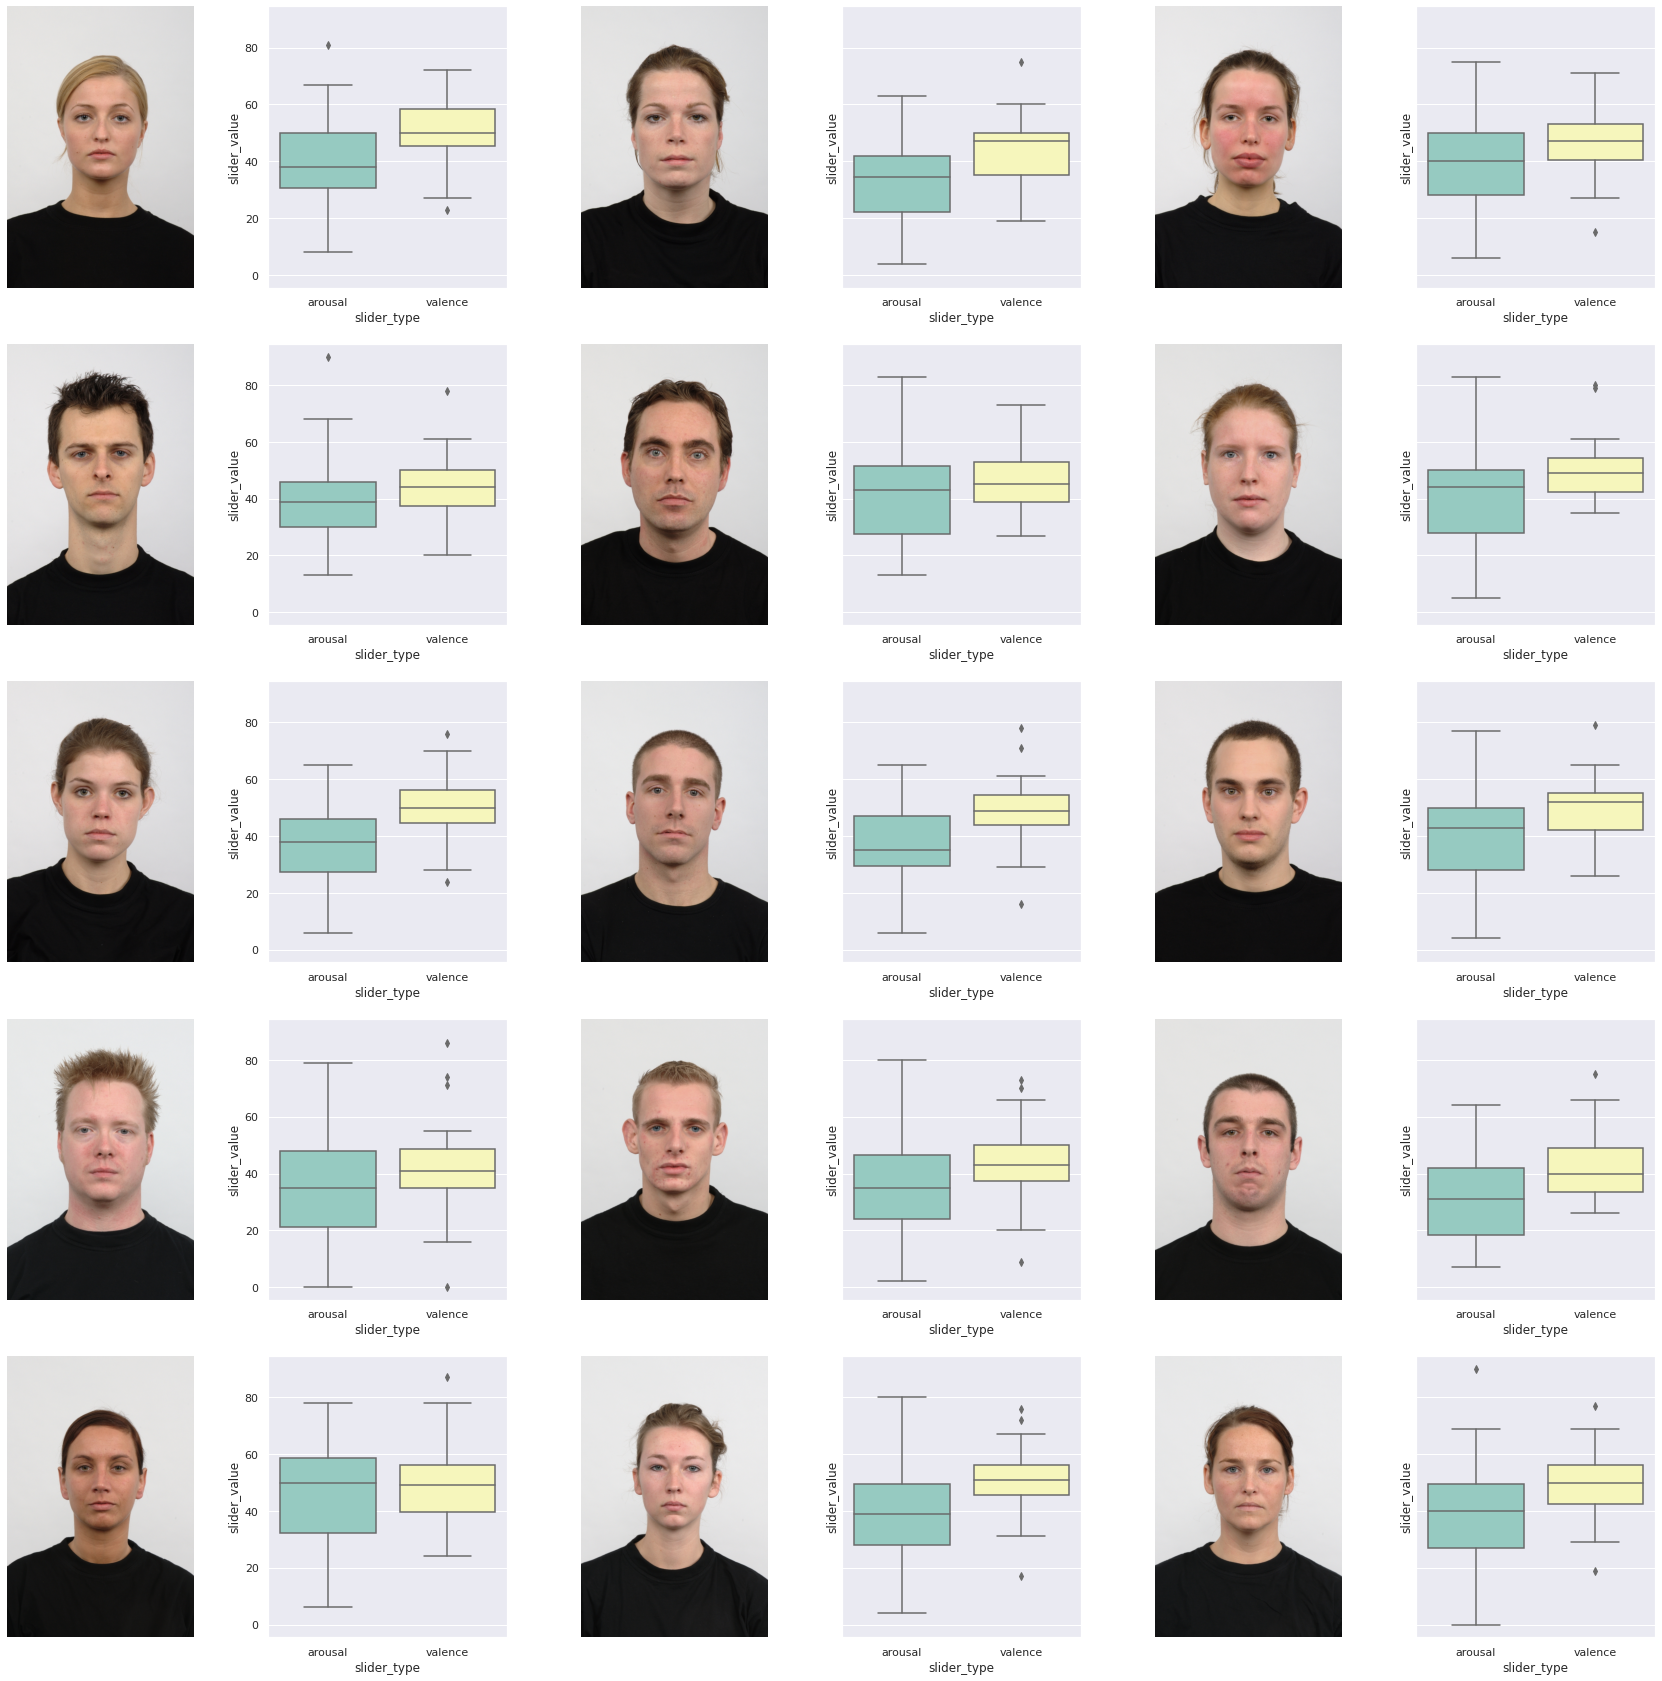

In [41]:
n_cols = 6
DB = "Radboud"
fig, axs = plt.subplots(nrows=math.ceil(30 / n_cols), ncols=n_cols, figsize=(30, 30))

set_share_axes(axs=axs[:, 1::2], sharey=True)

for i, pic_name in enumerate(sorted(df_session[df_session.DB == DB].pic_name.unique())):
    ix2 = i * 2

    with open(
        list(speech_web_app_image_dir.joinpath(DB).glob(f"{pic_name}*"))[0], "rb"
    ) as f:
        img = plt.imread(f)

    axs[ix2 // n_cols, ix2 % n_cols].imshow(img)
    axs[ix2 // n_cols, ix2 % n_cols].axis("off")

    sns.boxplot(
        ax=axs[(ix2 + 1) // n_cols, (ix2 + 1) % n_cols],
        data=df_session[(df_session.DB == DB) & (df_session.pic_name == pic_name)].melt(
            id_vars=set(df_session.columns).difference({"arousal", "valence"}),
            value_vars=["arousal", "valence"],
            var_name="slider_type",
            value_name="slider_value",
        ),
        x="slider_type",
        y="slider_value",
        palette="Set3",
        # bw=0.2,
        # inner="quartile",
    )


## Over time

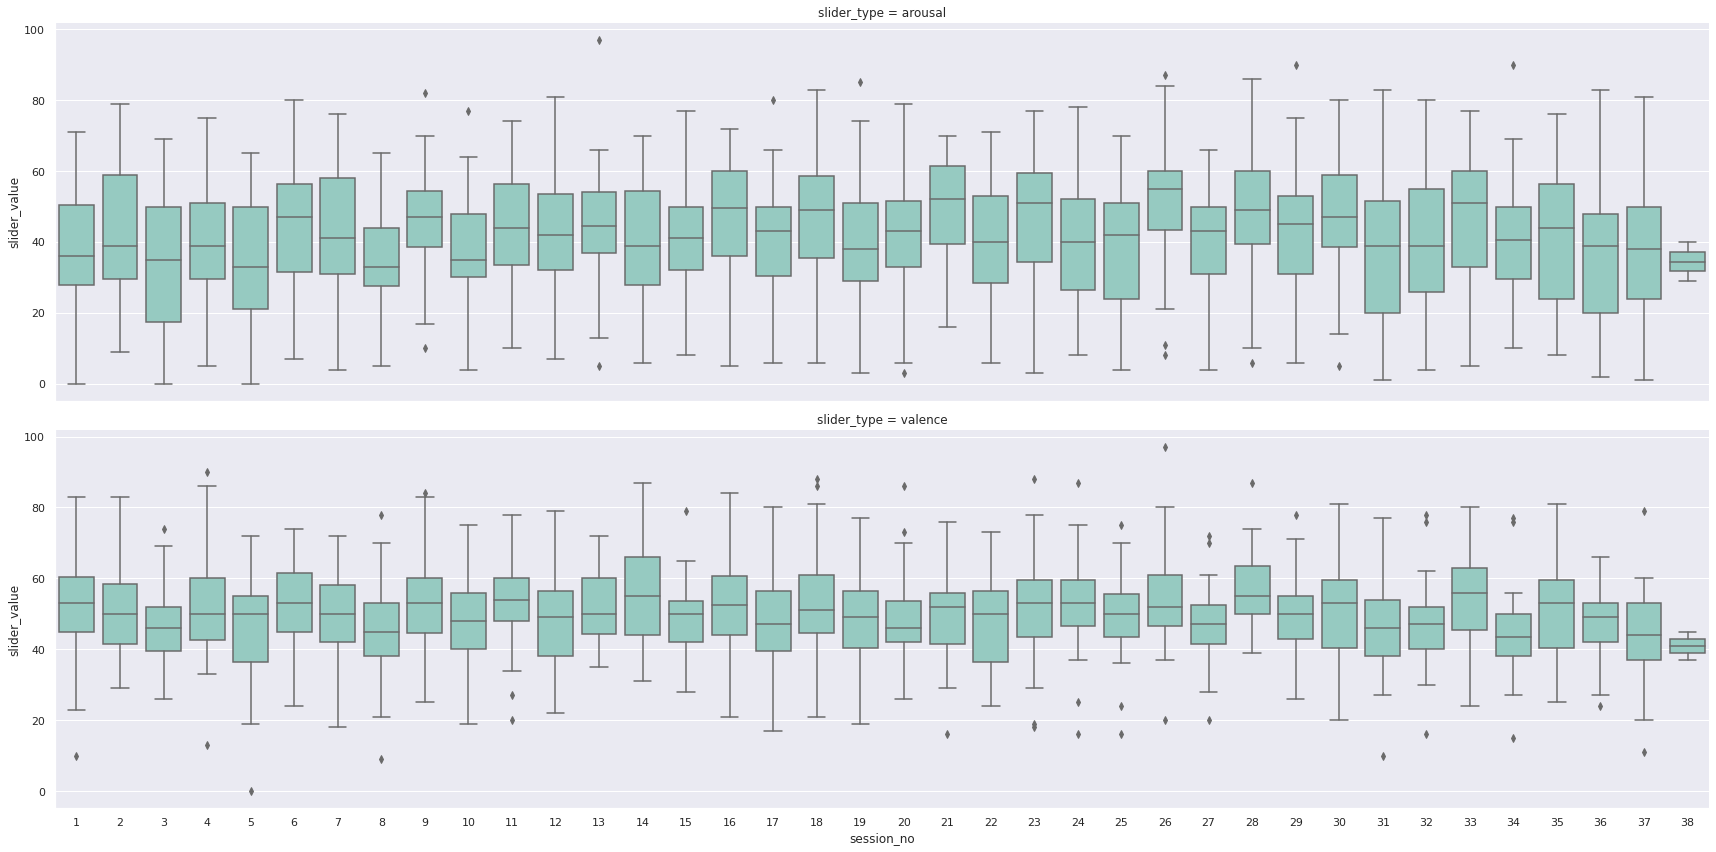

In [52]:
sns.catplot(
    data=df_session[df_session.DB_no < 16].melt(
        id_vars=set(df_session.columns).difference({"arousal", "valence"}),
        value_vars=["arousal", "valence"],
        var_name='slider_type',
        value_name='slider_value'
    ),
    sharex=True,
    sharey=True,
    legend=True,
    kind='box', 
    x='session_no',
    y='slider_value',
    row='slider_type',
    # color='lightseagreen',
    color=(0.5529411764705883, 0.8274509803921568, 0.7803921568627451),
    height=6,
    aspect=4,
)

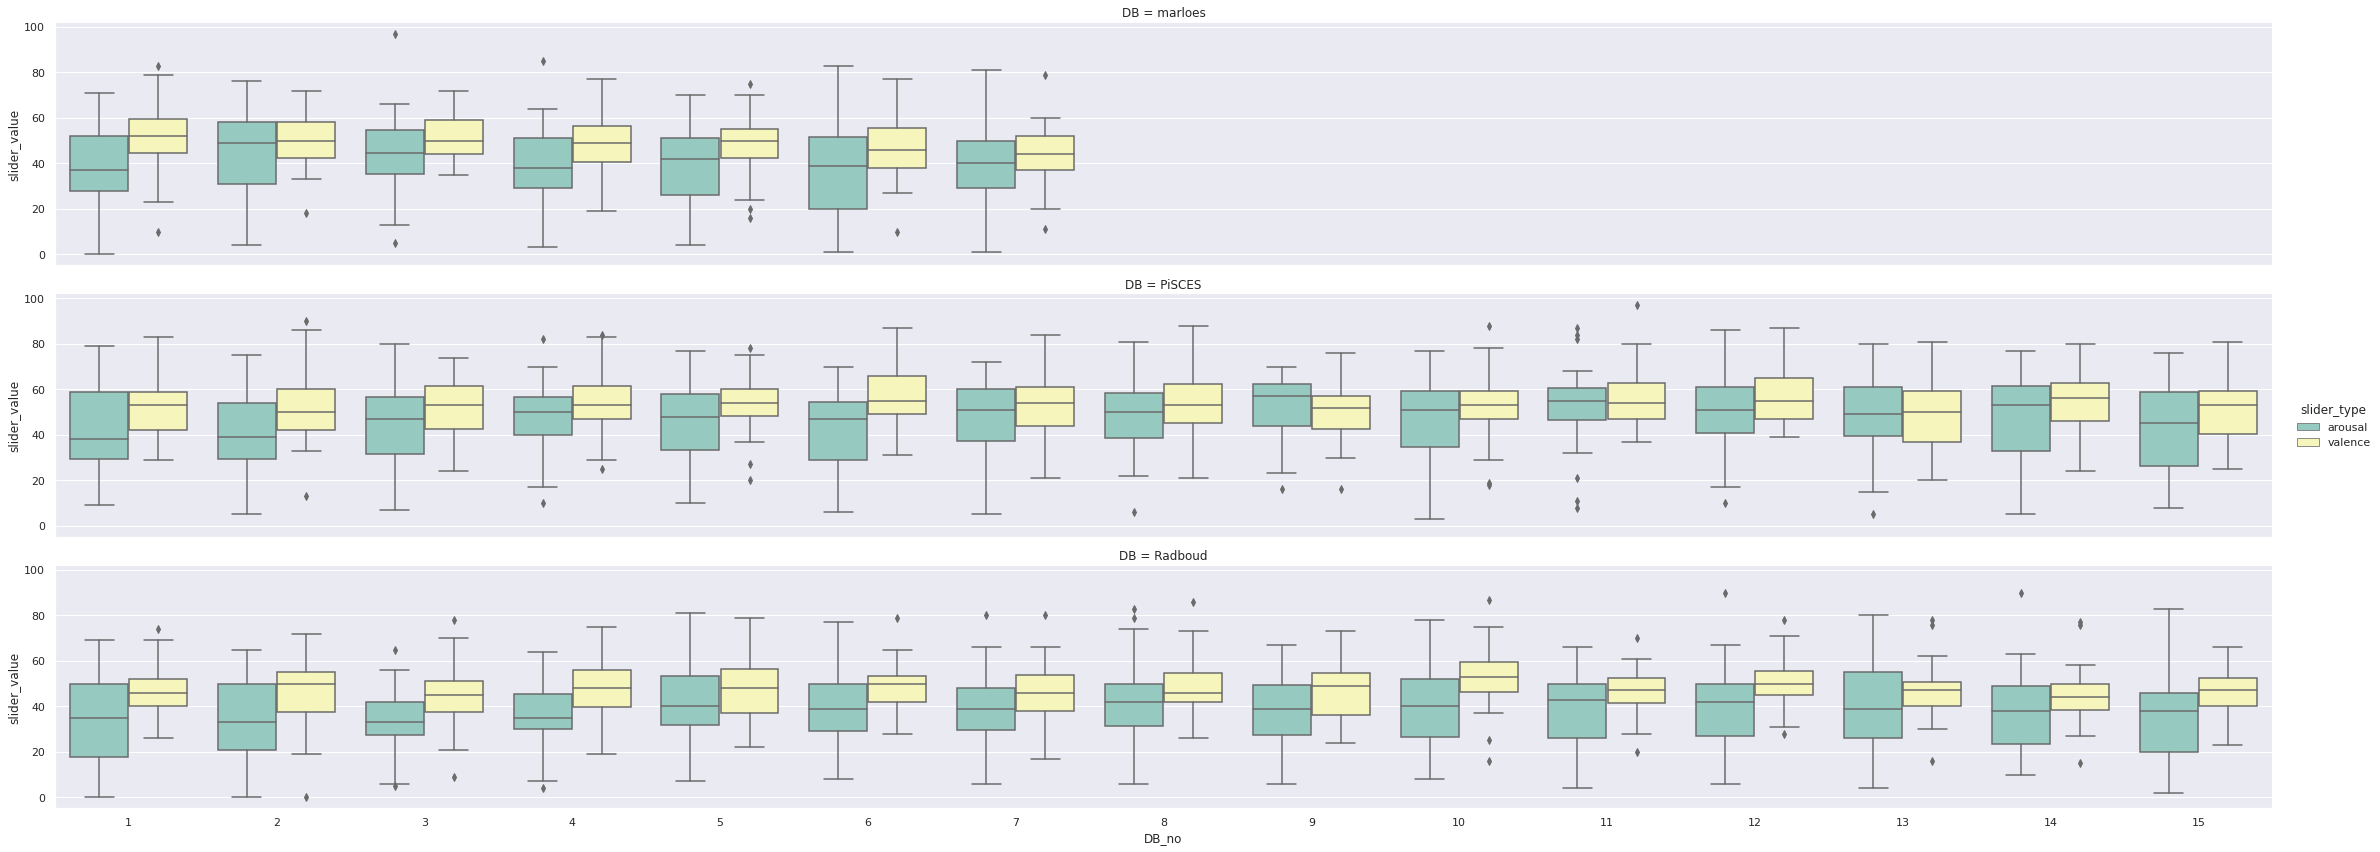

In [58]:
sns.catplot(
    data=df_session[df_session.DB_no < 16].melt(
        id_vars=set(df_session.columns).difference({"arousal", "valence"}),
        value_vars=["arousal", "valence"],
        var_name="slider_type",
        value_name="slider_value",
    ),
    sharex=True,
    sharey=True,
    legend=True,
    kind="box",
    x="DB_no",
    y='slider_value',
    hue="slider_type",
    row="DB",
    palette="Set3",
    height=4,
    aspect=8,
)

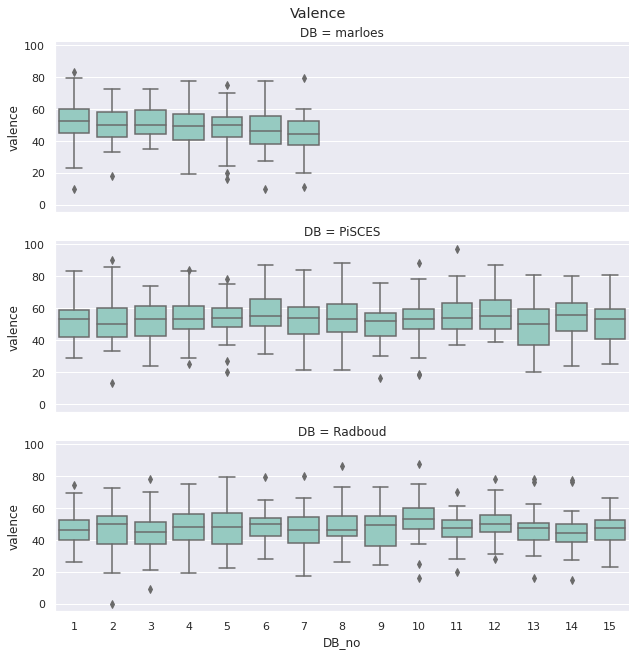

------------------------------------------------------------------------------------------------------------------------


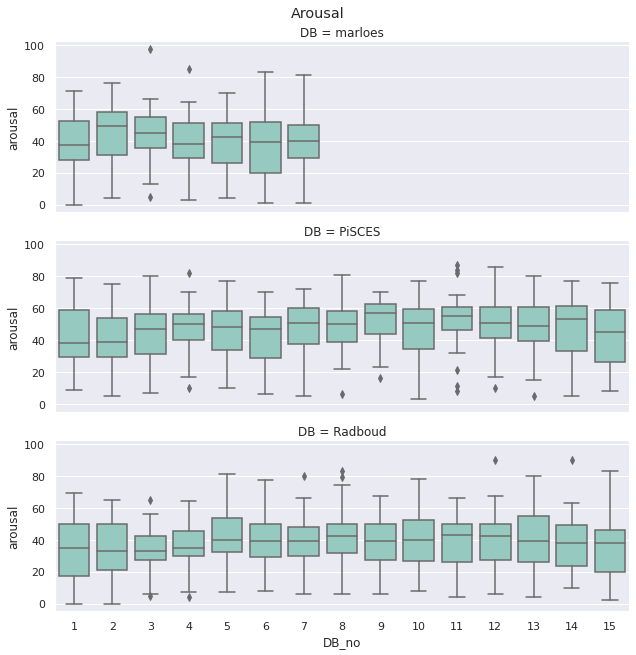

In [62]:
g = sns.catplot(
    data=df_session[df_session.DB_no < 16],
    sharex=True,
    sharey=True,
    legend=True,
    kind="box",
    x="DB_no",
    y="valence",
    row="DB",
    color=(0.5529411764705883, 0.8274509803921568, 0.7803921568627451),
    height=3,
    aspect=3,
)
g.fig.suptitle("Valence", y=1.01)
plt.show()

print("-" * 120)
g = sns.catplot(
    data=df_session[df_session.DB_no < 16],
    sharex=True,
    sharey=True,
    legend=True,
    kind="box",
    x="DB_no",
    y="arousal",
    row="DB",
    # color='lightseagreen',
    color=(0.5529411764705883, 0.8274509803921568, 0.7803921568627451),
    height=3,
    aspect=3,
)
g.fig.suptitle("Arousal", y=1.01)
plt.show()